In [1]:
import pandas as pd
import numpy as np

In [27]:
lung_cap = pd.read_csv(r"E:\Croma-Campus-Python-\Data\LungCapData.csv")
lung_cap.tail()

,LungCap,Age,Height,Smoke,Gender,Caesarean
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no
724,7.100,10,67.7,no,male,no


In [28]:
lung_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [29]:
lung_cap.isna().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [40]:
lung_cap.Smoke.value_counts()

no     648
yes     77
Name: Smoke, dtype: int64

In [64]:
lung_cap = pd.get_dummies(lung_cap, prefix = ['Smoke', 'Gender','Caesarean'])

In [66]:
lung_cap.head()

,LungCap,Age,Height,Smoke_no,Smoke_yes,Gender_female,Gender_male,Caesarean_no,Caesarean_yes
0,6.475,6,62.1,1,0,0,1,1,0
1,10.125,18,74.7,0,1,1,0,1,0
2,9.550,16,69.7,1,0,1,0,0,1
3,11.125,14,71.0,1,0,0,1,1,0
4,4.800,5,56.9,1,0,0,1,1,0


In [75]:
var = lung_cap.iloc[:,1:]
target = lung_cap.iloc[:,0]

In [77]:
var.head()

,Age,Height,Smoke_no,Smoke_yes,Gender_female,Gender_male,Caesarean_no,Caesarean_yes
0,6,62.1,1,0,0,1,1,0
1,18,74.7,0,1,1,0,1,0
2,16,69.7,1,0,1,0,0,1
3,14,71.0,1,0,0,1,1,0
4,5,56.9,1,0,0,1,1,0


In [78]:
target.head()

0     6.475
1    10.125
2     9.550
3    11.125
4     4.800
Name: LungCap, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(var,target, test_size = 0.2, random_state = 42)

In [84]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [85]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [86]:
lin_reg.coef_, lin_reg.intercept_

(array([ 0.15600412,  0.26800487,  0.27516137, -0.27516137, -0.20581485,
         0.20581485,  0.12195269, -0.12195269]),
 -11.76016306263433)

In [87]:
y_pred = lin_reg.predict(x_train)

In [88]:
error = y_pred- y_train 

In [90]:
MSE = np.mean(np.square(error))
MSE

1.0086676013714666

In [91]:
y_test_pred = lin_reg.predict(x_test)

In [92]:
error_test = y_test_pred - y_test

In [94]:
MSE_test = np.mean(np.square(error_test))
MSE_test

1.134520903397914

In [96]:
r_square = lin_reg.score(x_train,y_train)
r_square

0.857772819369019

In [101]:
# adj_rsquare = 1 - (((1-r_sqaure)*(N-1))/(N-k-1))
n = len(x_train)
k = len(lung_cap.columns)
adj_r_square = 1 - (((1-r_square)*(n-1))/(n-k-1))
adj_r_square

0.8555271270432666

In [103]:
err = pd.DataFrame(error)

In [105]:
import matplotlib.pyplot as plt

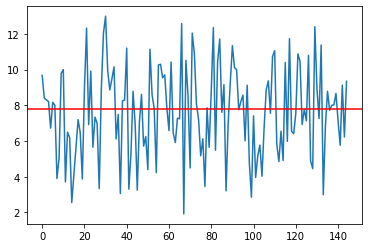

In [108]:
plt.plot(y_test_pred)
plt.axhline(np.mean(y_test), color = 'r')

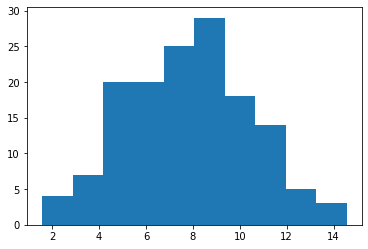

In [112]:
plt.hist(y_test);